In [2]:
#We will make a basic CNN model to classify CIFAR-100#
#We will use Keras from Tensorflow to build the model#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import datetime

#show the tensorflow version
print(tf.__version__)


2.10.1


In [3]:
#Test if have GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13987605156389543952
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5713690624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2567009239529556758
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#load the CIFAR-100 dataset & split into train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#Normalize pixel values from 1-255 to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

#show the shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#shuffle train & test data

# # Assuming x_train and y_train are your data
# indices = np.arange(x_train.shape[0])
# np.random.shuffle(indices)

# # Let's say we want to select 10000 random samples
# x_train_subset = x_train[indices[:10000]]
# y_train_subset = y_train[indices[:10000]]

In [5]:
#Build model

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Block 5
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         7

In [6]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])
#save loss & validation loss every 
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/40


c:\Users\MSI\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 17s 7ms/step - loss: 4.1406 - accuracy: 0.0518 - val_loss: 3.7454 - val_accuracy: 0.1134
Epoch 2/40
1563/1563 [==============================] - 12s 8ms/step - loss: 3.4528 - accuracy: 0.1632 - val_loss: 3.2150 - val_accuracy: 0.2062
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 3.0532 - accuracy: 0.2372 - val_loss: 3.0014 - val_accuracy: 0.2527
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 2.7655 - accuracy: 0.2928 - val_loss: 2.7789 - val_accuracy: 0.2937
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5363 - accuracy: 0.3392 - val_loss: 2.7338 - val_accuracy: 0.3142
Epoch 6/40
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3444 - accuracy: 0.3799 - val_loss: 2.6433 - val_accuracy: 0.3316
Epoch 7/40
1563/1563 [==============================] - 12s 8ms/step - loss: 2.1846 - accuracy: 0.4149 - val_loss: 2.5445 - val_accuracy: 0.3

In [7]:
print(val_loss)

[3.7454440593719482, 3.2150261402130127, 3.001356601715088, 2.7788593769073486, 2.7338380813598633, 2.64327335357666, 2.544508218765259, 2.55387282371521, 2.634860038757324, 2.5981948375701904, 2.689633369445801, 2.6805014610290527, 2.804408311843872, 2.910388708114624, 3.0015599727630615, 3.085251569747925, 3.276285409927368, 3.403085947036743, 3.460239887237549, 3.569857120513916, 3.850787878036499, 3.777381658554077, 3.939168691635132, 3.996596574783325, 4.164283275604248, 4.28247594833374, 4.494472503662109, 4.602880954742432, 4.531852722167969, 4.588955879211426, 4.850240707397461, 4.785402297973633, 4.998676300048828, 5.229121685028076, 5.078365802764893, 5.166639804840088, 5.310577869415283, 5.189931869506836, 5.29189395904541, 5.470278263092041]


In [8]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 5.4703 - accuracy: 0.3289 - 818ms/epoch - 3ms/step

Test accuracy: 0.328900009393692


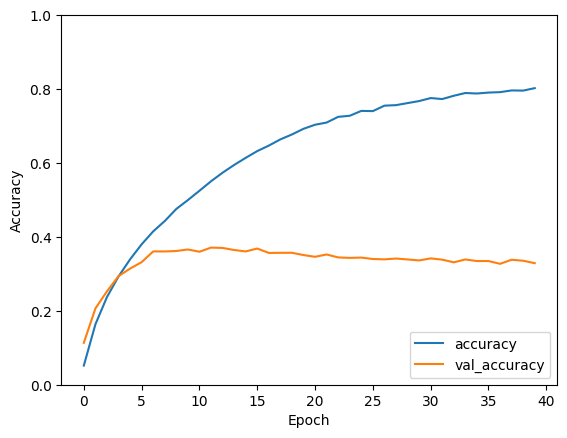

In [9]:
#Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


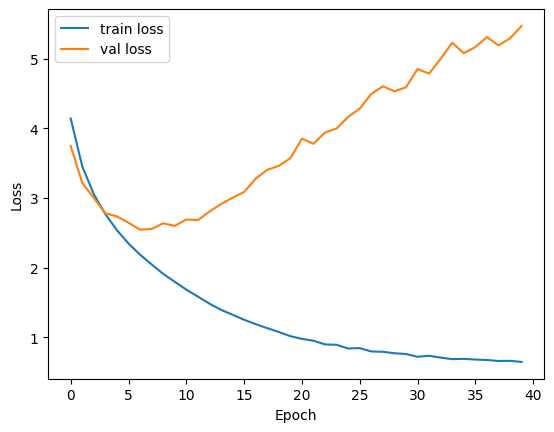

In [10]:
#plot loss
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label = 'val loss')  

plt.xlabel('Epoch')
plt.ylabel('Loss')
#legend
plt.legend(loc='upper left')
#show plot
plt.show()


In [ ]:
## CONFUSION MATRIX
# Load both fine and coarse labels
(x_train_fine, y_train_fine), (x_test_fine, y_test_fine) = cifar100.load_data(label_mode='fine')
(x_train_coarse, y_train_coarse), (x_test_coarse, y_test_coarse) = cifar100.load_data(label_mode='coarse')

# Establish a mapping from fine labels to coarse labels
class_to_superclass = {}
for fine, coarse in zip(y_train_fine.flatten(), y_train_coarse.flatten()):
    if fine not in class_to_superclass:
        class_to_superclass[fine] = coarse

# Optional: Check the mapping (for understanding/debugging)
print("Sample of class to superclass mapping:", {k: class_to_superclass[k] for k in list(class_to_superclass)[:5]})

# Predict the classes using the trained model
y_pred = model.predict(x_test_fine)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_super = np.vectorize(class_to_superclass.get)(y_pred_classes)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix for superclasses
cm_super = confusion_matrix(y_test_coarse, y_pred_super)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_super)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Superclasses')
plt.xlabel('Predicted Superclass')
plt.ylabel('True Superclass')
plt.show()



## Save the trained Model

In [1]:
#save the trained model (Parameters) so I can use it again without training again
model.save('cifar100_cnn.h5')
#save the trained model (Weights) so I can use it again without training again
model.save_weights('cifar100_cnn_weights.h5')


NameError: name 'model' is not defined

## Load the trained Model

In [ ]:
#load the trained model (Parameters) so I can use it again without training again
#model = keras.models.load_model('cifar100_cnn.h5')

#load the trained model (Weights) so I can use it again without training again
#model.load_weights('cifar100_cnn_weights.h5')